In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
# conversion factors
a0 = 5.29e-11 # Bohr radius in m
Eh = 4.36e-18 # Hartree energy in J
me = 9.109e-31 # electron mass in kg
mp = 1.673e-27 # proton mass in kg
uma = 1.66e-27 # atomic mass unit in kg
mass_factor = mp/me # mass factor to convert from uma to me

## Canonical ensemble:1D harmonic oscillator case

In our last session we focused in the microcanical ensemble and its state function: the entropy. Today we will explore the features of the canonical ensemble where the number of particles (N), the pressure (P) and the temperature (T) remain as constant. 

Starting with the 1-D harmonic oscillator case we have the Hamiltonian is :
$$
H = \frac{p^2}{2m} + \frac{1}{2}m \omega^2 x^2 , \\ \omega = \sqrt{\frac{k}{m}}
$$

The main difference with the microcanonical ensemble is the contact with a thermal bath of temperature T. In fact, this allow to the system to remain close to a specific temperature, thus, varying its total energy. 


In [2]:
from potentials import *
from walker import Trajectory1D
#pot = create_potential("Harmonic", k=0.707, x0=0.0) # au
pot = create_potential("Harmonic", k=(0.707 * Eh/a0**2 ), x0=0.0) # J/m^2
traj = Trajectory1D(potential=pot, m=8*uma, dt=1e-15, steps=1000000, x0=0.1*a0, v0=0.0, integrator="langevin", gamma=1.0e12, kT=10)

In this case and in comparison with the microcanonical ensemble we choose a new integrator for the Newton equations: the langevin integrator:

# Langevin Equation

The Langevin equation describes the motion of a particle subject to the potential forces, velocities and a thermal flunctuation

For a particle of mass `m` and position `x(t)`:

$$
m a(t) = - \nabla V(x) - \gamma m v(t) + R(t)
$$

Where:
- $V(x)$ = potential energy
- $\gamma$ = friction (damping) coefficient
- $R(t)$ = random force (Gaussian white noise)

and can be interpretated as:
- The deterministic part (`-∇V(x)`) drives motion as in Newton's law.
- The friction term (`-γ m v`) removes energy (dissipation).
- The noise term (`R(t)`) adds energy back from the thermal bath.
- Together, they ensure the system equilibrates at temperature `T`.

In short: Langevin dynamics = Newton’s law + friction + noise, consistent with thermal equilibrium at temperature T, and most important it ensure a correct Boltzmann distribution

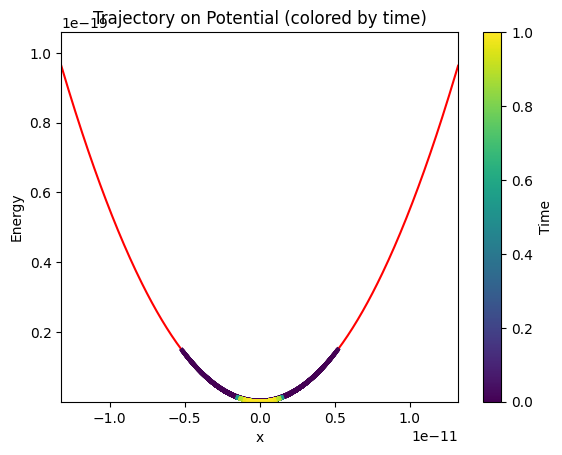

In [3]:
#Run the dynamic and analyze the plots
traj.run()
traj.plot_on_potential(xmin=-0.25*a0, xmax=0.25*a0)

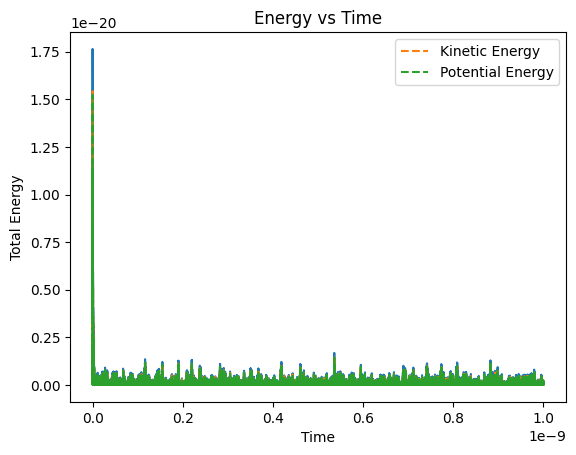

In [4]:
traj.plot_energy()

In [5]:
0.2E-9/ 1E-15

200000.0

Similar to number of microstates $\Omega(E)$ computed in the NVE ensemble, the canonical ensemble relies on the partition function:


$$Z(\beta)=\frac{1}{h}\int_{-\infty}^{\infty}d\textbf{p}\int_{-\infty}^{\infty}d\textbf{x}e^{-\beta H(x,p)}, \\ 
\\ \beta = \frac{1}{k_{B}T} $$

if we separate the momentum integrals from the position integrals we get:
$$Z(\beta)=\frac{1}{h}\left ( \int_{-\infty}^{\infty}d\textbf{p}e^{-\beta \textbf{p}^{2}/ 2m}\right ) \left ( \int_{-\infty}^{\infty}d\textbf{x}e^{-\frac{1}{2}\beta m \omega^{2}\textbf{x}^{2}}\right )$$

where due to the kinetic energy is always $\frac{p^2}{2m}$ we can solve the momentum integral as (considering gaussian integration):

$$ \int_{-\infty}^{\infty}d\textbf{p}e^{-\beta \textbf{p}^{2}/ 2m} = \sqrt{\frac{2 \pi m}{\beta}}$$

On the other hand, due we know the position integral and it has analytic solution for the harmonic oscillator we obtain:

$$ \int_{-\infty}^{\infty}d\textbf{x}e^{-\frac{1}{2}\beta m \omega^{2} \textbf{x}^{2}} = \sqrt{\frac{2 \pi }{\beta m \omega^{2}}}$$

Thus, the partition function can be explicitely formulated as:

$$Z(\beta) = \frac{1}{h}Z_{IG}Z_{conf} \\ .. \\ =\frac{1}{h}\left (\sqrt{\frac{2 \pi m}{\beta}}\right)\left(\sqrt{\frac{2 \pi }{\beta m \omega^{2}}}\right)\\..\\ = \frac{1}{h}\frac{2 \pi}{\beta \omega}$$

The partition function is related with the Helmholtz energy trough the following relationship:

$$F = -k_{B}T\ln {Z} = -k_{B}T\ln {\left ( \frac{1}{h}\frac{2 \pi}{\beta \omega} \right )}$$

Therefore we can obtain a ideal gas and configurational contribution of the Free energy:
$$F_{conf} = -k_{B}T\ln(\sqrt{\frac{2 \pi }{\beta m \omega^{2}}}) \\
F_{IG} = -k_{B}T\ln( (\sqrt{\frac{2 \pi m}{\beta}})$$

In [ ]:
# paramaters in Si units
m = 8*uma # mass m in kg
k = (0.707 * Eh/a0**2 )  # spring constant in J/m^2  
omega = np.sqrt(k/m) # angular frequency rad/s
kB = 1.38e-23 # Boltzmann constant in J/K
h = 6.626e-34  # Planck constant in Js
T = 10 # temperature in K
beta = 1/(kB*T) # atomic units of 1/J 
Z = 2*np.pi/(beta*omega*h) # partition function dimensionless
F = -kB*T*np.log(Z) # Helmholtz free energy
print(f"Partition function: {Z}")
print(f"Helmholtz free energy: {F*6.022e23/1000} kJ/mol")

Partition function: 0.004543696150796158
Helmholtz free energy: 0.44826202074469174 kJ/mol


In [6]:

# paramaters in atomic units
m = 8*mass_factor # mass m in me (atomic units) 
k = 0.707  # spring constant in atomic units of force  
omega = np.sqrt(k/m) # angular frequency rad/s
kB = 1.38e-23/Eh # Boltzmann constant in atomic units of energy (Eh) per Kelvin (K)
h = 2*np.pi  # Planck constant in atomic units of energy (Eh) times time (s)
T = 10 # temperature in K
beta = 1/(kB*T) # atomic units of 1/Eh 
Z = 2*np.pi/(beta*omega*h) # partition function dimensionless
F = -kB*T*np.log(Z) # Helmholtz free energy
print(f"Partition function: {Z}")
print(f"Helmholtz free energy: {F*Eh*6.022e23/1000} kJ/mol")

Partition function: 0.004562895295685993
Helmholtz free energy: 0.4479116107300186 kJ/mol


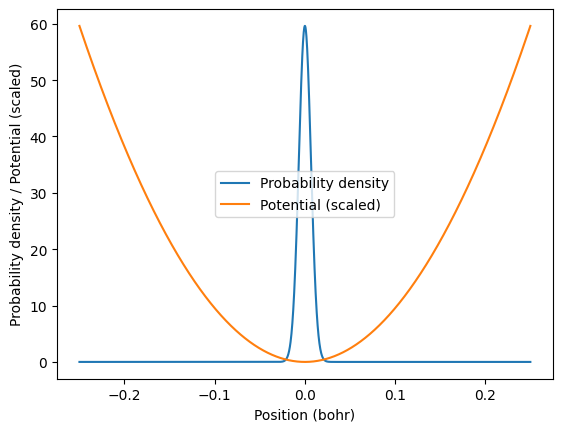

In [7]:
x = np.linspace(-1, 1, 10000)

# Probability distribution
P = np.sqrt(m*omega**2/(2*np.pi*kB*T)) * np.exp(-0.5*m*omega**2*x**2/(kB*T))
P /= np.trapz(P, x)  # normalize area = 1

# Potential
V = 0.5*k*x**2
# Focus on the region around the minimum
x_min, x_max = -0.25, 0.25
mask = (x >= x_min) & (x <= x_max)

# Scale potential to match P in the window
V_window = V[mask]
P_window = P[mask]
V_scaled = (V_window - V_window.min()) / (V_window.max() - V_window.min()) * P_window.max()

# Plot
plt.plot(x[mask], P_window, label='Probability density')
plt.plot(x[mask], V_scaled, label='Potential (scaled)')
plt.xlabel('Position (bohr)')
plt.ylabel('Probability density / Potential (scaled)')
plt.legend()
plt.show()

# Compute the configurational free energy from the MD simulation

$$F_{conf} = -k_{B}T\ln(\sqrt{\frac{2 \pi }{\beta m \omega^{2}}}) $$

In [8]:
Z_conf = np.sqrt(2*np.pi/(m*beta*omega**2))

In [9]:
F_config_analytic = (-kB * T * np.log(Z_conf))*Eh

Now we can obtain $F_{conf}$ from the simulation considering the following relation:

$$P(x) = \frac{e^{-\beta U(x)}}{Z}$$

where P(x) is the Boltzmann probability density sampled from the MD simulation that integrates to 1 : $$\int P(x)dx = 1$$

Considering P(x) and $F_{conf}=-k_{B}T\ln{Z}$ we can rewrite the free energy as:


$$F_{conf} = \left\langle U(x) \right\rangle + k_{B}T\int\ln({P(x)})P(x)$$

where $\left\langle U(x) \right\rangle$ is the average of the potential energy and P(x) correspond to the probability density function at position x

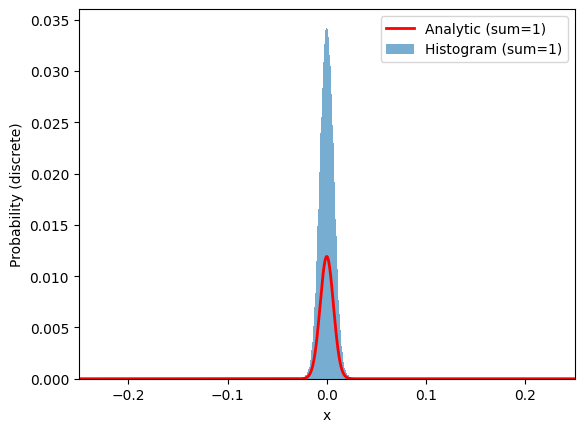

In [11]:
bins = 100
# Get raw counts, not density
counts, bin_edges = np.histogram(traj.x[200000:]/a0, bins=bins, density=False)

# Normalize so sum = 1
prob = counts / counts.sum()

x_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.bar(x_centers, prob, width=(bin_edges[1]-bin_edges[0]), alpha=0.6, label="Histogram (sum=1)")

# Analytic probability density
x = np.linspace(-1, 1, 10000)
P = np.sqrt(m*omega**2/(2*np.pi*kB*T)) * np.exp(-0.5*m*omega**2*x**2/(kB*T))

# To compare fairly, convert density → discrete probabilities per bin
dx = bin_edges[1] - bin_edges[0]
P_discrete = P / P.sum()   # normalize to sum=1 on grid (like histogram)

plt.plot(x, P_discrete, 'r-', lw=2, label="Analytic (sum=1)")

plt.xlabel("x")
plt.ylabel("Probability (discrete)")
plt.xlim(-0.25, 0.25)
plt.legend()
plt.show()


In [13]:
bins = 100
hist, bin_edges = np.histogram(traj.x[200000:]/a0, bins=bins, density=True)
dx = bin_edges[1] - bin_edges[0] 
x_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
rho_x = hist

In [14]:
U_avg_from_traj = np.mean(traj.E_p[200000:])

In [15]:
U_avg_from_traj

7.352502379671268e-23

In [16]:

F_config = kB * T * np.sum(rho_x * np.log(rho_x + 1e-100) * dx)*Eh  + U_avg_from_traj
print("Configurational Helmholtz free energy (J):", F_config)
print("Analytic Configurational Helmholtz free energy (J):", F_config_analytic)
print("Difference (kJ/mol):", (F_config - F_config_analytic) * 6.022e23 / 1000)

Configurational Helmholtz free energy (J): 5.643099089412005e-22
Analytic Configurational Helmholtz free energy (J): 5.641527802964441e-22
Difference (kJ/mol): 9.462286987232692e-05


# BONUS: COMPUTE THE G.I and the total Free Energy


# Entropy of the Canonical Ensemble

Also we can relate the partition function with the entropy as:
$$S = -\left ( \frac{\partial F}{\partial T}\right )_{N,V} \\ 
...\\
..\\
S(T) = k_{B}+k_{B}\ln{\left(\frac{2\pi k_{B}T}{h\omega}\right)} $$

If we compare against the microcanonical ensemble you can realize that the entropy now depend on the temperature of the system. Therefor in molecular dynamic simulation we need to be able to control the temperature to high accuracy in order to obtain reliable numerical values of the thermodynamical properties.

In [26]:
S_sim = kB  * np.sum(rho_x * np.log(rho_x + 1e-20) * dx)  * Eh
print("Configurational entropy (J/K):", S_sim)

Configurational entropy (J/K): 4.9078488514448786e-23


In [27]:
S_analytic = (np.log(2*np.pi*kB*T/(h*m*omega**2))+1)*(kB/2) * Eh
print("Analytic configurational entropy (J/K):", S_analytic)

Analytic configurational entropy (J/K): -6.219662978786889e-23


In [28]:
(S_analytic - S_sim )*6.022e23 

-67.0098762416557

In [29]:
S_sim*6.022e23

29.555065783401062

In [30]:
S_analytic*6.022e23

-37.45481045825465

In [36]:
# Why the analytic entropy gives a negative value?
# try to compute the entropy using the quantum harmonic oscillator formula